<a href="https://colab.research.google.com/github/mjiii25/posco-academy/blob/main/Big-Data/0813-assignment-NN-KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **인공신경망 (분류)**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


### **데이터 구성하기**

In [9]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/유방암.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [12]:
df_raw.loc[df_raw['diagnosis'] == '양성', 'diagnosis'] = 1
df_raw.loc[df_raw['diagnosis'] == '음성', 'diagnosis'] = 0

df_raw['diagnosis'] = df_raw['diagnosis'].astype(int)

In [13]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [14]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

결측치는 발견되지 않는 것으로 보인다.

In [16]:
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis', axis = 1, inplace = False)

In [19]:
print(df_raw_y.shape)
df_raw_y.head()

(320,)


0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [20]:
print(df_raw_x.shape)
df_raw_x.head()

(320, 30)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [37]:
v_feature_name = df_raw_x.columns

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,-0.157678,-0.879112,-0.165550,-0.232872,-0.744948,-0.479220,-0.550769,-0.628488,-0.997431,-0.392627,...,-0.149283,-1.156442,-0.153789,-0.224951,0.490637,0.139396,-0.094470,-0.301949,0.525611,0.511081
1,-1.312779,-2.560965,-1.328928,-1.150194,-0.240274,-1.153621,-1.143404,-1.199934,-1.773612,0.184077,...,-1.341759,-2.517236,-1.380396,-1.124201,0.254373,-1.046076,-1.159323,-1.480312,-1.387506,-0.507149
2,0.695279,-0.420644,0.602798,0.596040,-0.947380,-0.675307,-0.477679,-0.212084,-0.899042,-1.174101,...,0.534893,-0.143296,0.445031,0.432104,-0.613360,-0.367031,0.004076,0.172850,0.223844,-0.886803
3,-0.211154,-1.301385,-0.255876,-0.308762,-1.291796,-0.661126,-0.788224,-0.834410,-0.658535,-0.834209,...,-0.263312,-1.490846,-0.312546,-0.354487,-1.339335,-0.169261,-0.176669,-0.458230,-0.524077,-0.220788
4,-0.753945,-1.738136,-0.820314,-0.745704,-2.095198,-1.505004,-1.175403,-1.326415,-1.933950,-0.956793,...,-0.951354,-1.934512,-0.997708,-0.869505,-1.783511,-1.108951,-1.094404,-1.366747,-1.071301,-0.898278


In [38]:
df_scaled_train_x, df_scaled_test_x, df_train_y, df_test_y = train_test_split(df_scaled,
                                                                              df_raw_y,
                                                                              test_size = 0.4,
                                                                              random_state = 1234)

print('train x 크기 : {}'.format(df_scaled_train_x.shape))
print('test x 크기 : {}'.format(df_scaled_test_x.shape))
print('train y 크기 : {}'.format(df_train_y.shape))
print('test y 크기 : {}'.format(df_test_y.shape))

train x 크기 : (192, 30)
test x 크기 : (128, 30)
train y 크기 : (192,)
test y 크기 : (128,)


### **MLP 모델 생성하기**

In [39]:
nn_uncustomized = MLPClassifier(random_state =1234)
nn_uncustomized.fit(df_scaled_train_x, df_train_y)

print('Accuracy on train set : {}'.format(nn_uncustomized.score(df_scaled_train_x, df_train_y).round(3)))
print('Accuracy on test set : {}'.format(nn_uncustomized.score(df_scaled_test_x, df_test_y).round(3)))

Accuracy on train set : 0.995
Accuracy on test set : 0.953


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


해당 MLP 모델은 train과 test 데이터에 대해 각각 99.5%, 95.3%의 설명력을 갖는다.

### **모델 파라미터 변경하기 : Hidden Layer**

In [43]:
train_accuracy = []; test_accuracy = []
para_hidden = [hidden * 20 for hidden in range(1,8)]

for v_hidden in para_hidden :
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state =1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden['hidden_layer'] = para_hidden
df_accuracy_hidden['TrainAccuracy'] = train_accuracy
df_accuracy_hidden['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [44]:
df_accuracy_hidden.round(3)

,hidden_layer,TrainAccuracy,TestAccuracy
0,20,0.995,0.938
1,40,0.995,0.945
2,60,0.995,0.945
3,80,0.995,0.938
4,100,0.995,0.953
5,120,0.995,0.953
6,140,0.995,0.953


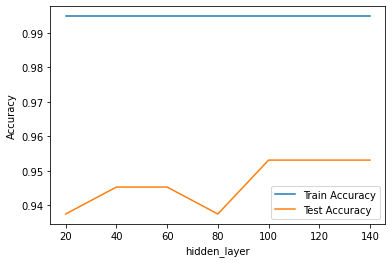

In [45]:
plt.plot(para_hidden, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_hidden, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('hidden_layer')
plt.legend()
plt.show()

- hidden layer가 증가하여도 모델의 성능에 큰 변화가 없다.
- test accuracy가 0.953, train accuracy가 0.995인 **hidden_layer_sizes = 100**을 선택한다.

### **모델 파라미터 변경하기 : Activation Function**

In [49]:
train_accuracy = []; test_accuracy = []
para_function = ['logistic', 'tanh', 'relu']

for v_function in para_function :
    nn = MLPClassifier(hidden_layer_sizes = (100,100),
                       activation = v_function,
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_function = pd.DataFrame()
df_accuracy_function['ActivationFunction'] = para_function
df_accuracy_function['TrainAccuracy'] = train_accuracy
df_accuracy_function['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [50]:
df_accuracy_function.round(3)

,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.995,0.938
1,tanh,1.000,0.945
2,relu,1.000,0.945


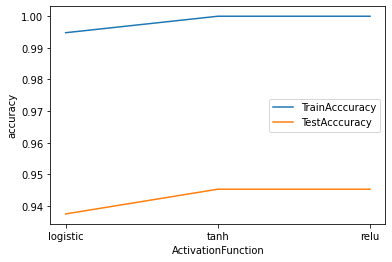

In [51]:
plt.plot(para_function, train_accuracy, linestyle = '-', label = 'TrainAcccuracy')
plt.plot(para_function, test_accuracy, linestyle = '-', label = 'TestAcccuracy')
plt.ylabel('accuracy'); plt.xlabel('ActivationFunction')
plt.legend()
plt.show()

- 활성화 함수가 logistic일 때에 비해 tanh, relu일 때 모델의 성능이 향상되지만, train 데이터에 대해 과대적합의 현상이 발견되고 있는 것으로 보인다.
- testscore가 0.938, trainscore가 0.995인 **activation = logistic**을 선택한다.

### **모델 파라미터 변경하기 : Solver**


In [52]:
train_accuracy = []; test_accuracy = []
para_solver = ['lbfgs', 'sgd', 'adam']

for v_solver in para_solver :
    nn = MLPClassifier(hidden_layer_sizes = (100,100),
                       activation = 'logistic',
                       solver = v_solver,
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_solver = pd.DataFrame()
df_accuracy_solver['Solver'] = para_solver
df_accuracy_solver['TrainAccuracy'] = train_accuracy
df_accuracy_solver['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [53]:
df_accuracy_solver.round(3)

,Solver,TrainAccuracy,TestAccuracy
0,lbfgs,1.000,0.930
1,sgd,0.599,0.758
2,adam,0.995,0.938


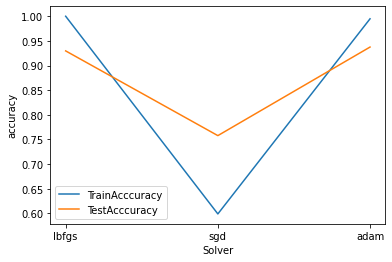

In [54]:
plt.plot(para_solver, train_accuracy, linestyle = '-', label = 'TrainAcccuracy')
plt.plot(para_solver, test_accuracy, linestyle = '-', label = 'TestAcccuracy')
plt.ylabel('accuracy'); plt.xlabel('Solver')
plt.legend()
plt.show()

- 가중치가 lbfgs 또는 adam일 경우 sgd보다 더 좋은 모델 성능을 보여준다.
- lbfgs일 경우 train에 대한 모델의 성능이 100%이며, 이는 과대적합을 의미한다.
- testscore가 0.938, trainscore가 0.995인 **solver = adam**을 선택한다.

### **모델 파라미터 변경하기 : Mini Batch**


In [55]:
train_accuracy = []; test_accuracy = []
para_batch = [batch * 20 for batch in range(1,10)]

for v_batch in para_batch :
    nn = MLPClassifier(hidden_layer_sizes = (100,100),
                       activation = 'logistic',
                       solver = 'adam',
                       batch_size = v_batch,
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x, df_test_y))

df_accuracy_batch = pd.DataFrame()
df_accuracy_batch['MiniBatch'] = para_batch
df_accuracy_batch['TrainAccuracy'] = train_accuracy
df_accuracy_batch['TestAccuracy'] = test_accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

In [58]:
df_accuracy_batch.round(3)

,MiniBatch,TrainAccuracy,TestAccuracy
0,20,1.000,0.953
1,40,0.995,0.953
2,60,0.995,0.945
3,80,0.995,0.945
4,100,0.995,0.945
5,120,0.995,0.945
6,140,0.995,0.945
7,160,0.995,0.945
8,180,0.995,0.938


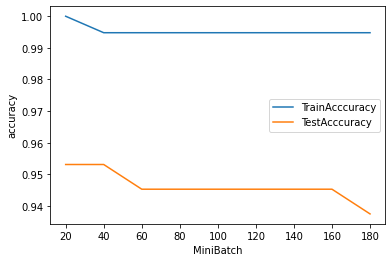

In [57]:
plt.plot(para_batch, train_accuracy, linestyle = '-', label = 'TrainAcccuracy')
plt.plot(para_batch, test_accuracy, linestyle = '-', label = 'TestAcccuracy')
plt.ylabel('accuracy'); plt.xlabel('MiniBatch')
plt.legend()
plt.show()

- mini batch가 커질수록 모델의 성능이 감소하거나 영향을 거의 주지 않는다.
- 모델의 성능을 최대로 끌어올리도록 mini batch가 작은 값을 선택한다.
- testscore가 0.953, trainscore가 0.995인 **batch_size = 40**을 선택한다.

### **최종 모델 선택**

In [62]:
nn_final = MLPClassifier(hidden_layer_sizes = (100,100),
                         activation = 'logistic',
                         solver = 'adam',
                         batch_size = 40,
                         random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
y_pred = nn_final.predict(df_scaled_test_x)

print('Accuracy on training set : {}'.format(nn_final.score(df_scaled_train_x, df_train_y).round(3)))
print('Accuracy on test set : {}'.format(nn_final.score(df_scaled_test_x, df_test_y.round(3))))
print('Confusion matrix : \n'.format(confusion_matrix(df_test_y, y_pred)))
print(classification_report(df_test_y, y_pred, digits = 3))

Accuracy on training set : 0.995
Accuracy on test set : 0.953125
Confusion matrix : 

              precision    recall  f1-score   support

           0      0.979     0.959     0.969        97
           1      0.879     0.935     0.906        31

    accuracy                          0.953       128
   macro avg      0.929     0.947     0.938       128
weighted avg      0.955     0.953     0.954       128



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


- train과 test 데이터에 대해 각각 99.5%, 95.3%의 정확도를 갖는다.
- 1(양성)에 대한 precision이 0.879로, 실제 양성인 데이터 중 약 90%가 양성으로 예측되었다.
- 1(양성)에 대한 recall이 0.935로, 양성으로 예측된 데이터 중 약 90%가 양성이다.
- 1(양성)에 대한 f1-score가 0.906으로, 모델의 전체적인 분류 성능이 우수하다고 결론지을 수 있다.

---

# **kNN 분석**

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [64]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


### **데이터 구성하기**

In [65]:
df_raw = pd.read_csv('/content/mydrive/MyDrive/유방암.csv', encoding = 'euc-kr')

print(df_raw.shape)
df_raw.head()

(320, 31)


,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,음성,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,양성,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,음성,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,양성,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,양성,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [66]:
df_raw.loc[df_raw['diagnosis'] == '양성', 'diagnosis'] = 1
df_raw.loc[df_raw['diagnosis'] == '음성', 'diagnosis'] = 0

df_raw['diagnosis'] = df_raw['diagnosis'].astype(int)

In [67]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                320 non-null    int64  
 1   mean_radius              320 non-null    float64
 2   mean_texture             320 non-null    float64
 3   mean_perimeter           320 non-null    float64
 4   mean_area                320 non-null    float64
 5   mean_smoothness          320 non-null    float64
 6   mean_compactness         320 non-null    float64
 7   mean_concavity           320 non-null    float64
 8   mean_concave_points      320 non-null    float64
 9   mean_symmetry            320 non-null    float64
 10  mean_fractal_dimension   320 non-null    float64
 11  radius_error             320 non-null    float64
 12  texture_error            320 non-null    float64
 13  perimeter_error          320 non-null    float64
 14  area_error               3

In [68]:
df_raw.isnull().sum()

diagnosis                  0
mean_radius                0
mean_texture               0
mean_perimeter             0
mean_area                  0
mean_smoothness            0
mean_compactness           0
mean_concavity             0
mean_concave_points        0
mean_symmetry              0
mean_fractal_dimension     0
radius_error               0
texture_error              0
perimeter_error            0
area_error                 0
smoothness_error           0
compactness_error          0
concavity_error            0
concave_points_error       0
symmetry_error             0
fractal_dimension_error    0
worst_radius               0
worst_texture              0
worst_perimeter            0
worst_area                 0
worst_smoothness           0
worst_compactness          0
worst_concavity            0
worst_concave_points       0
worst_symmetry             0
worst_fractal_dimension    0
dtype: int64

데이터에 결측치는 발견되지 않는다.

In [69]:
df_raw_y = df_raw['diagnosis']
df_raw_x = df_raw.drop('diagnosis', axis = 1, inplace = False)

In [70]:
print(df_raw_y.shape)
df_raw_y.head()

(320,)


0    0
1    1
2    0
3    1
4    1
Name: diagnosis, dtype: int64

In [71]:
print(df_raw_x.shape)
df_raw_x.head()

(320, 30)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.14910,0.3331,0.3327,0.12520,0.3415,0.09740
1,10.80,9.71,68.77,357.6,0.09594,0.05736,0.02531,0.01698,0.1381,0.06400,...,11.60,12.02,73.66,414.0,0.14360,0.1257,0.1047,0.04603,0.2090,0.07699
2,18.31,18.58,118.60,1041.0,0.08588,0.08468,0.08169,0.05814,0.1621,0.05425,...,21.31,26.36,139.20,1410.0,0.12340,0.2445,0.3538,0.15710,0.3206,0.06938
3,14.92,14.93,96.45,686.9,0.08098,0.08549,0.05539,0.03221,0.1687,0.05669,...,17.18,18.22,112.00,906.6,0.10650,0.2791,0.3151,0.11470,0.2688,0.08273
4,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,13.62,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915


In [73]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x,
                                                                df_raw_y,
                                                                test_size = 0.4,
                                                                random_state = 1234)

print('train x 크기 : {}'.format(df_train_x.shape))
print('test x 크기 : {}'.format(df_test_x.shape))
print('train y 크기 : {}'.format(df_train_y.shape))
print('test y 크기 : {}'.format(df_test_y.shape))

train x 크기 : (192, 30)
test x 크기 : (128, 30)
train y 크기 : (192,)
test y 크기 : (128,)


### **KNN 모델 생성하기**

In [74]:
knn_uncustomized = KNeighborsClassifier()
knn_uncustomized.fit(df_train_x, df_train_y)

print('Accuracy on train set : {}'.format(knn_uncustomized.score(df_train_x, df_train_y).round(3)))
print('Accuracy on test set : {}'.format(knn_uncustomized.score(df_test_x, df_test_y).round(3)))

Accuracy on train set : 0.932
Accuracy on test set : 0.914


해당 KNN 모델은 train과 test 데이터에 대해 각각 93.2%, 91.4%의 설명력을 갖는다.

### **모델 파라미터 변경하기 : 이웃 수**

In [97]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(3,31)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors['Neighbors'] = para_n_neighbors
df_accuracy_neighbors['TrainAccuracy'] = train_accuracy
df_accuracy_neighbors['TestAccuracy'] = test_accuracy

In [98]:
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,3,0.932,0.898
1,4,0.911,0.891
2,5,0.932,0.914
3,6,0.927,0.914
4,7,0.927,0.898
5,8,0.922,0.914
6,9,0.911,0.906
7,10,0.911,0.906
8,11,0.917,0.906
9,12,0.917,0.906


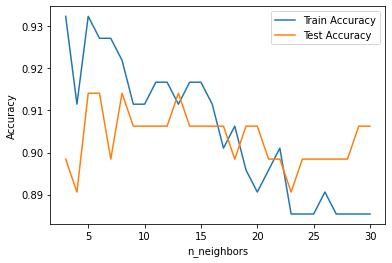

In [99]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = 'Train Accuracy')
plt.plot(para_n_neighbors, test_accuracy, linestyle = '-', label = 'Test Accuracy')
plt.ylabel('Accuracy'); plt.xlabel('n_neighbors')
plt.legend()
plt.show()

- hidden layer가 증가할수록 train에 대한 모델의 성능은 감소하는 반면에, test에 대한 모델의 성능은 상대적으로 변화가 없다.
- test accuracy가 0.906, train accuracy가 0.891인 **n_neighbors = 20**을 선택한다.

### **모델 파라미터 변경하기 : 가중치별 이웃 수**

In [102]:
train_accuracy = []; test_accuracy = []
para_n_neighbors = [i for i in range(3,31)] * 2
para_weights = (['uniform']) * 28 + (['distance'] * 28)

for (v_n_neighbors, v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors = v_n_neighbors,
                               weights = v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

df_accuracy_weights = pd.DataFrame()
df_accuracy_weights['Neighbors'] = para_n_neighbors
df_accuracy_weights['Weights'] = para_weights
df_accuracy_weights['TrainAccuracy'] = train_accuracy
df_accuracy_weights['TestAccuracy'] = test_accuracy

In [103]:
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,3,uniform,0.932,0.898
1,4,uniform,0.911,0.891
2,5,uniform,0.932,0.914
3,6,uniform,0.927,0.914
4,7,uniform,0.927,0.898
5,8,uniform,0.922,0.914
6,9,uniform,0.911,0.906
7,10,uniform,0.911,0.906
8,11,uniform,0.917,0.906
9,12,uniform,0.917,0.906


- 이웃 수가 증가할수록 train에 대한 모델의 성능은 과대적합되는 것으로 보인다.
- test accuracy가 0.906, train accuracy가 0.890인 **n_neighbors = 20, weight = 'uniform'**을 선택한다.

In [104]:
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = 'Neighbors',
                                                      columns = 'Weights',
                                                      values = ['TrainAccuracy', 'TestAccuracy'])
df_accuracy_weights_pivot

TrainAccuracy           TestAccuracy          
Weights        distance   uniform     distance   uniform
Neighbors                                               
3                   1.0  0.932292     0.898438  0.898438
4                   1.0  0.911458     0.898438  0.890625
5                   1.0  0.932292     0.914062  0.914062
6                   1.0  0.927083     0.929688  0.914062
7                   1.0  0.927083     0.890625  0.898438
8                   1.0  0.921875     0.906250  0.914062
9                   1.0  0.911458     0.914062  0.906250
10                  1.0  0.911458     0.929688  0.906250
11                  1.0  0.916667     0.914062  0.906250
12                  1.0  0.916667     0.906250  0.906250
13                  1.0  0.911458     0.906250  0.914062
14                  1.0  0.916667     0.906250  0.906250
15                  1.0  0.916667     0.906250  0.906250
16                  1.0  0.911458     0.906250  0.906250
17                  1.0  0.901042     0.906250  0.906250
18                  1.0  0.906250     0.898438  0.898438
19                  1.0  0.895833     0.898438  0.906250
20                  1.0  0.890625     0.906250  0.906250
21                  1.0  0.895833     0.898438  0.898438
22                  1.0  0.901042     0.906250  0.898438
23                  1.0  0.885417     0.906250  0.890625
24                  1.0  0.885417     0.906250  0.898438
25                  1.0  0.885417     0.898438  0.898438
26                  1.0  0.890625     0.906250  0.898438
27                  1.0  0.885417     0.906250  0.898438
28                  1.0  0.885417     0.906250  0.898438
29                  1.0  0.885417     0.906250  0.906250
30                  1.0  0.885417     0.914062  0.906250

In [105]:
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + '-' + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy-distance,TrainAccuracy-uniform,TestAccuracy-distance,TestAccuracy-uniform
Neighbors,,,,
3,1.0,0.932292,0.898438,0.898438
4,1.0,0.911458,0.898438,0.890625
5,1.0,0.932292,0.914062,0.914062
6,1.0,0.927083,0.929688,0.914062
7,1.0,0.927083,0.890625,0.898438


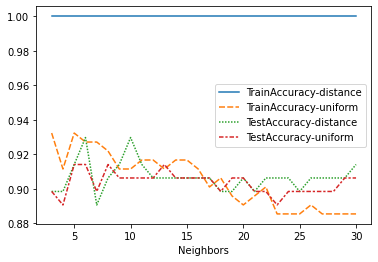

In [106]:
sns.lineplot(data = df_accuracy_weights_pivot)

- 이웃 수가 증가할수록 가중치가 'distance'인 train 데이터에 대한 모델 성능에는 변화가 없으며, 오히려 과대적합의 현상이 발생하는 것으로 보인다.
- 가중치가 'distance'인 train 데이터와 가중치가 'distance', 'uniform'인 test 데이터에 대한 모델 성능은 소폭 감소하는 것으로 보인다.